In [617]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [421]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Владислав\Downloads\hodograph.csv", sep=',', header=0)
print(df)

     rec_x  rec_y      time
0   -100.0 -100.0  0.237912
1    -80.0 -100.0  0.235332
2    -60.0 -100.0  0.231905
3    -40.0 -100.0  0.230841
4    -20.0 -100.0  0.223027
..     ...    ...       ...
116   20.0  100.0  0.218737
117   40.0  100.0  0.227905
118   60.0  100.0  0.233424
119   80.0  100.0  0.237045
120  100.0  100.0  0.237334

[121 rows x 3 columns]


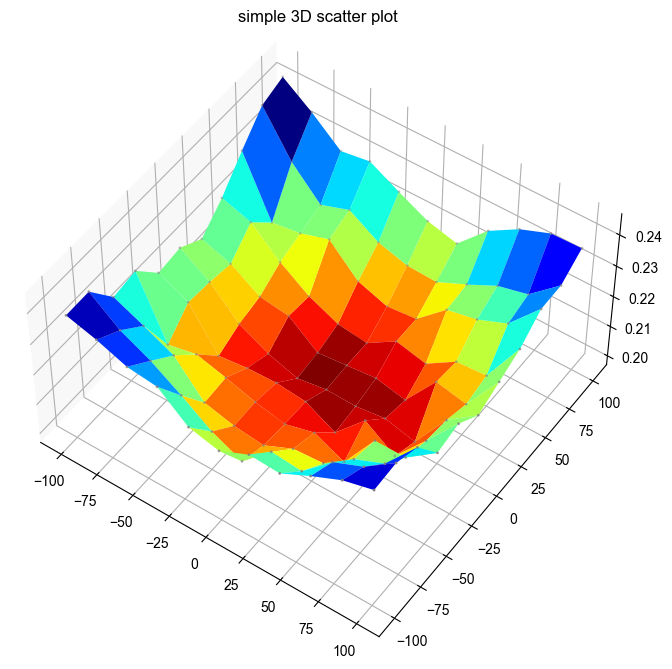

In [422]:
plt.rcParams["font.family"] = "arial"

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (2.5,2.5,1.4))
ax.view_init(elev=50., azim=-55)

# ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

X = np.array(df["rec_x"]).reshape(11, 11)
Y = np.array(df["rec_y"]).reshape(11, 11)
Z = np.array(df["time"]).reshape(11, 11)

# Creating plot
ax.plot_surface(X, Y, Z, cmap = "jet_r")
ax.scatter3D(df["rec_x"], df["rec_y"], df["time"], color = "gray", s = 1)

plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

In [423]:
from scipy.interpolate import griddata

# Assuming X, Y, Z are your original arrays
points = np.array([X.ravel(), Y.ravel()]).T
values = Z.ravel()

# Create new grid
xnew = np.linspace(X.min(), X.max(), 1100)
ynew = np.linspace(Y.min(), Y.max(), 1100)
Xnew, Ynew = np.meshgrid(xnew, ynew)
points_new = np.array([Xnew.ravel(), Ynew.ravel()]).T

# Interpolate data on the new grid
Znew = griddata(points, values, points_new, method='quadric')
Znew = Znew.reshape((1100, 1100))

# Now Xnew, Ynew, Znew are your interpolated arrays of shape (1100, 1100)


ValueError: Unknown interpolation method 'quadric' for 2 dimensional data

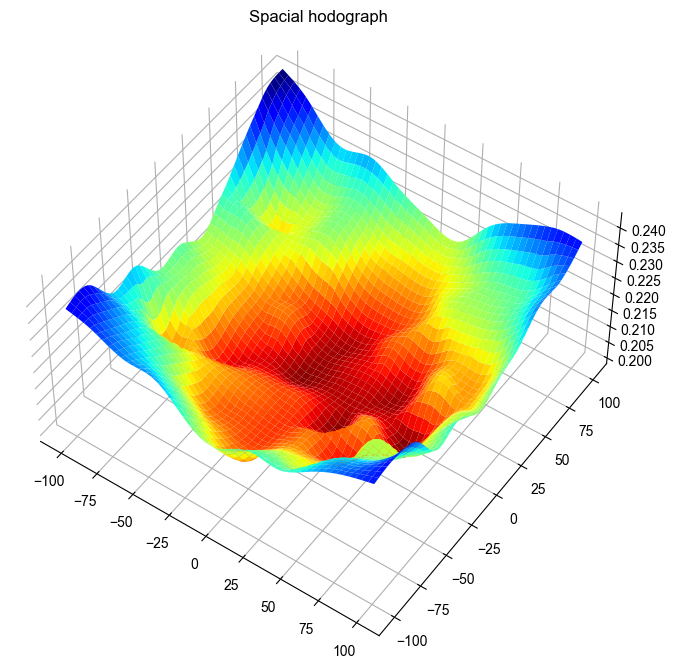

In [424]:
plt.rcParams["font.family"] = "arial"

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (2.5,2.5,1.4))
ax.view_init(elev=50., azim=-55)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Creating plot
ax.plot_surface(Xnew, Ynew, Znew, cmap = "jet_r")
# ax.scatter3D(df["rec_x"], df["rec_y"], znew, color = "gray", s = 1)

plt.title("Spacial hodograph")
 
# show plot
plt.show()

In [425]:
bnds = ((0,None), (1, None))

In [705]:
# Your function
def residuals(params, x, y, t_measured):
    t0, v = params
    time_new = np.sqrt(t0**2 + (x**2+y**2)/(v**2))
    return np.linalg.norm(t_measured - time_new, ord= 2)

def callback(params):
    residuals_history.append(residuals(params, x, y, t_measured))
    params_history.append(params.copy())

# Initial guess for t0 and v
initial_guess = [0, 600]
residuals_history = []
params_history = []

# Your measured times and coordinates
x = np.array(df["rec_x"])  # fill with your data
y = np.array(df["rec_y"])  # fill with your data
t_measured = np.array(df["time"])  # fill with your data

# Call the optimizer
result = minimize(fun = residuals, 
                  x0 = initial_guess, 
                  args=(x, y, t_measured),
                  tol = 1e-10,
                  bounds = bnds,
                  method = "TNC",
                  options={'disp': True},
                  jac = False,
                  callback = callback
                 )


# The optimal parameters are in result.x
t0_opt, v_opt = result.x

In [706]:
t0_opt, v_opt

(0.20061431975710253, 1038.0627105537797)

In [707]:
import os

In [708]:
os.listdir()

['.ipynb_checkpoints',
 'BinarySearchLeetcode.ipynb',
 'Binary_search.ipynb',
 'CSR_matrix.ipynb',
 'Custom_cmap.ipynb',
 'gaus_interp',
 'Geohronology.ipynb',
 'get-pip.py',
 'GIS_homework1.ipynb',
 'Godographs.ipynb',
 'godographs2.ipynb',
 'godographs505',
 'godographs_2',
 'Interactive.ipynb',
 'Inversion (2 attempt).ipynb',
 'Inversion (3 attempt).ipynb',
 'Inversion (first step).ipynb',
 'InversionAc',
 'InversionAVO',
 'lfm.mat',
 'lfm.txt',
 'lfm2.mat',
 'lfm3.mat',
 'lfm_buguzun.mat',
 'lfm_buguzun2.mat',
 'lfm_DEV2.mat',
 'LFM_tomography.ipynb',
 'MATRIX_GIF5',
 'method_t0.ipynb',
 'ML1_assignment.ipynb',
 'ML_kamashev_1.ipynb',
 'NSU_python_2_semestr',
 'OOP.ipynb',
 'Own_Fourier.ipynb',
 'Petroportal Course',
 'Plotly.ipynb',
 'PYGAME.ipynb',
 'pygem.ipynb',
 'Python_NeuralNetworks',
 'PyVista_TUT.ipynb',
 'ReformatStratWells.ipynb',
 'RL_module_V3.ipynb',
 'SPB_Butorin_python',
 'Spectral_analysis',
 'TechnoHack',
 'TestBackUp.ipynb',
 'ThreadsC.ipynb',
 'Untitled.ipynb',


![car_gif_url](https://shorturl.at/qxS36)

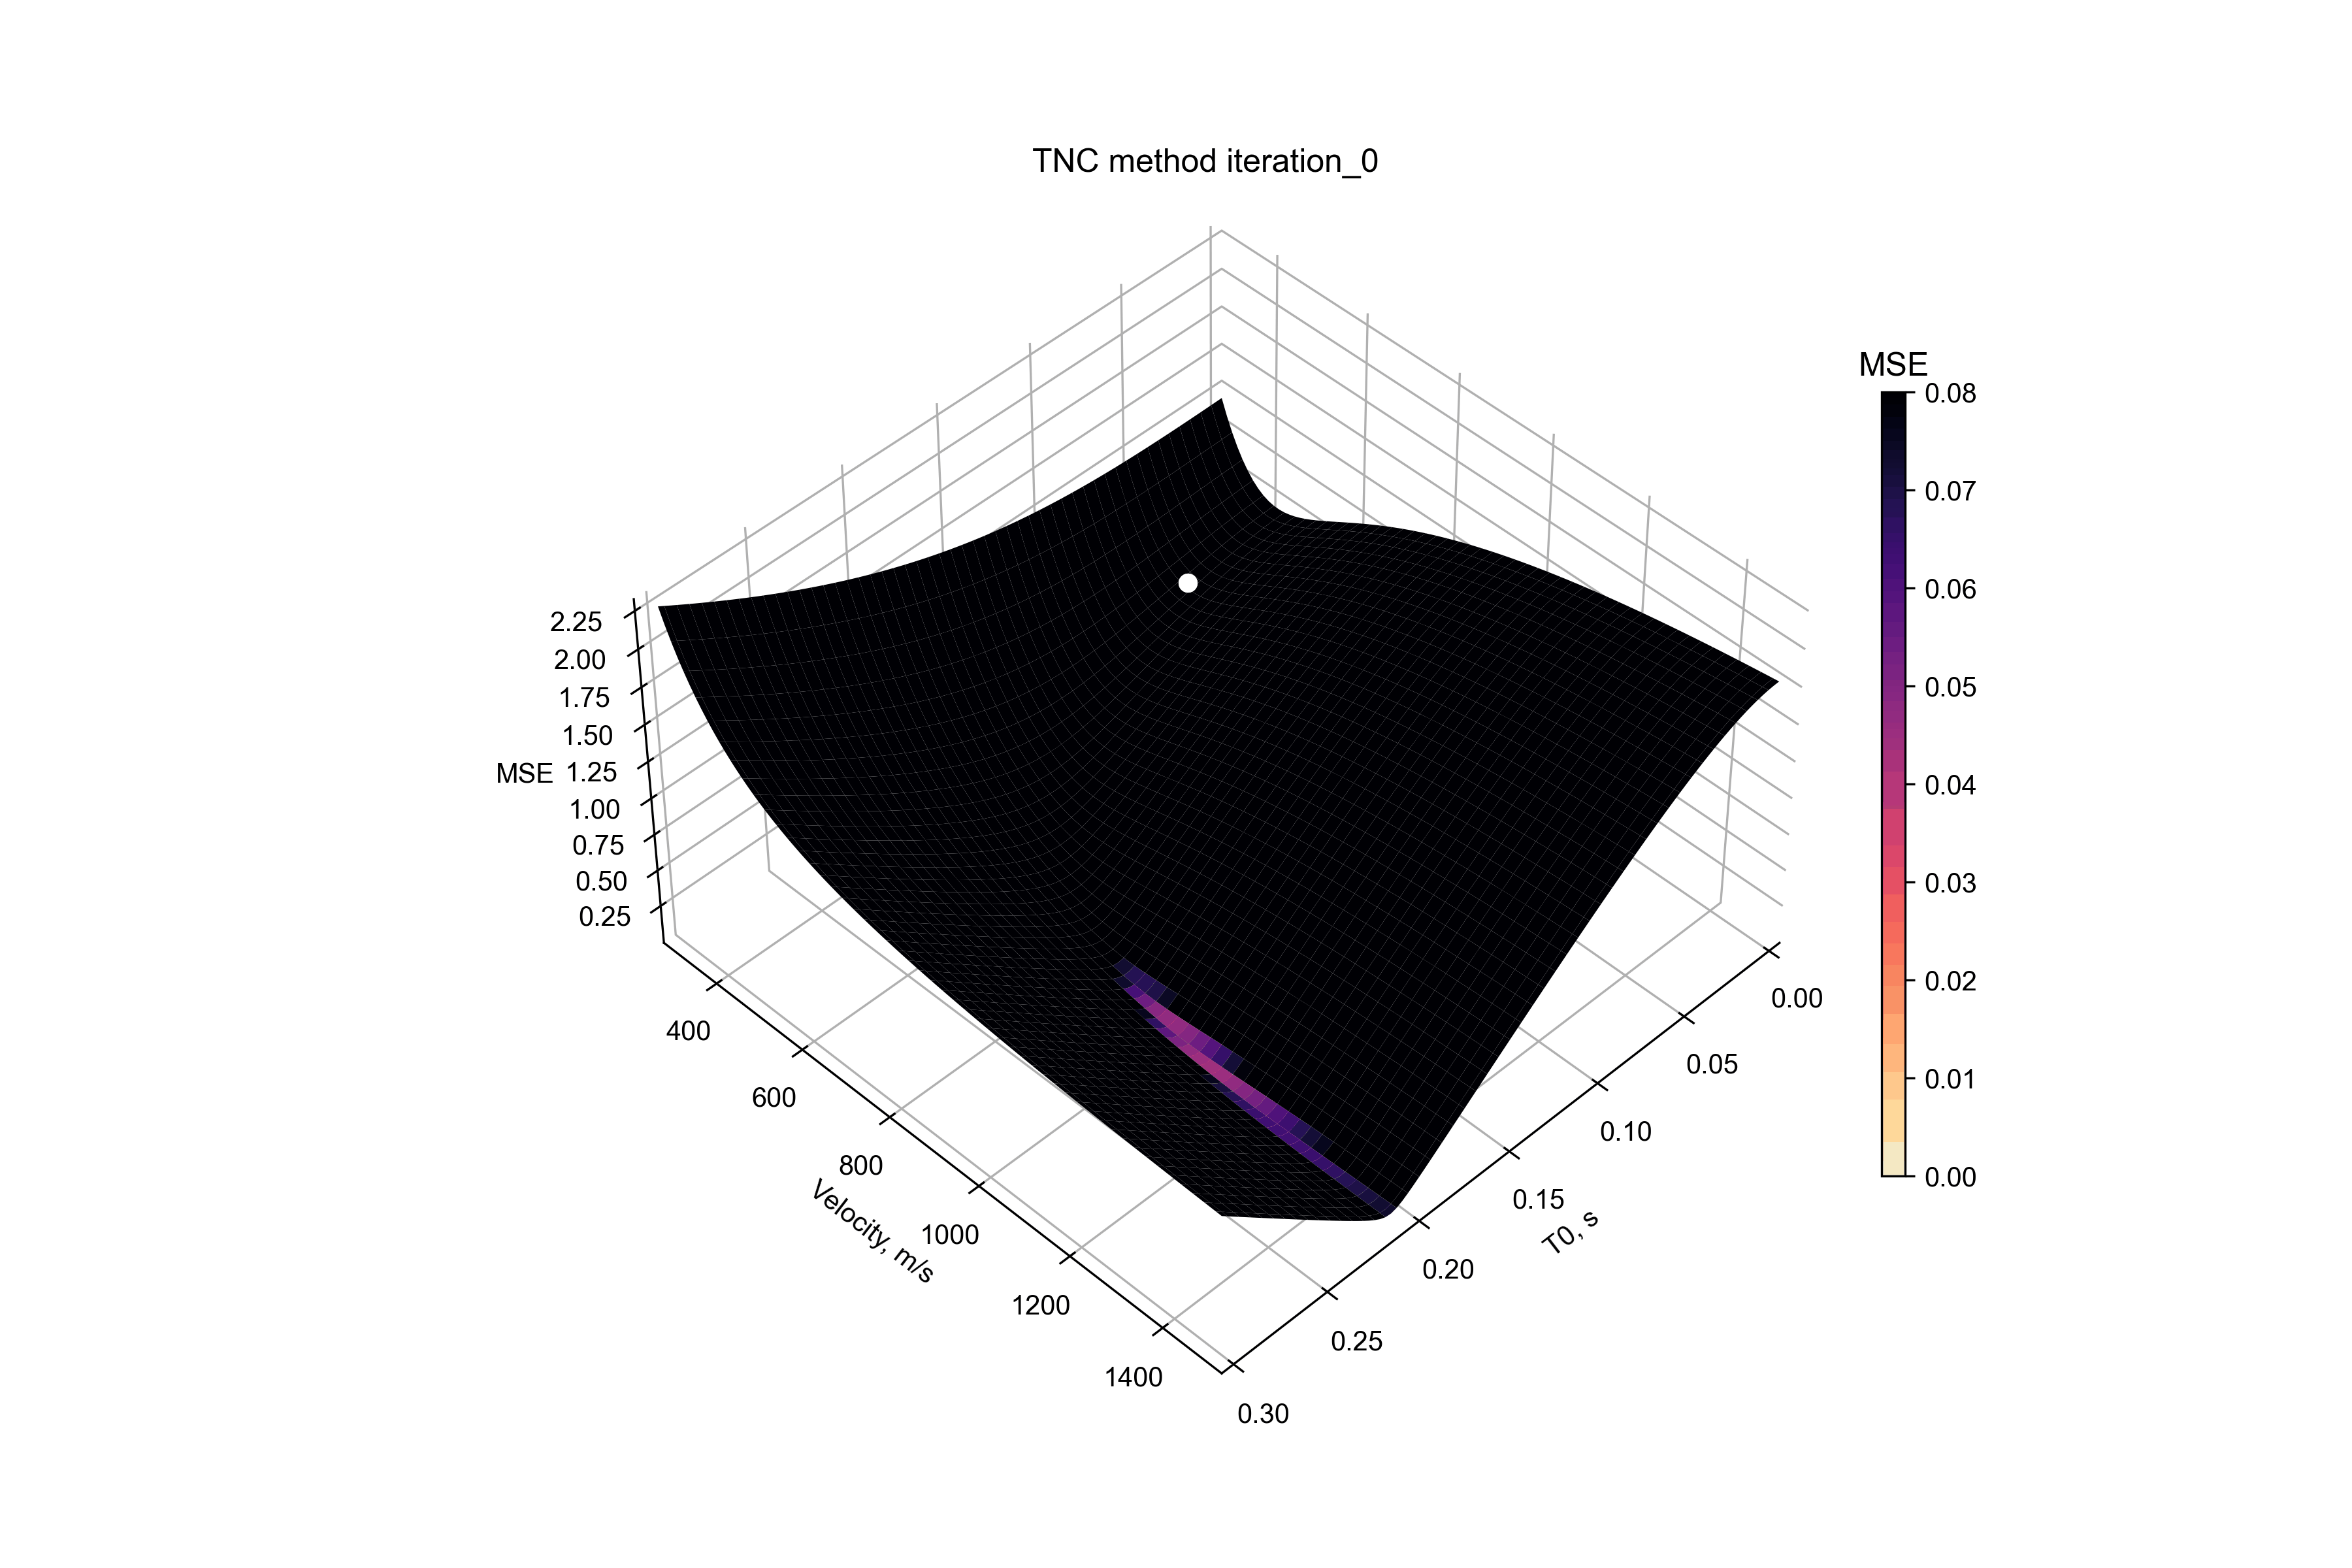

In [709]:
from IPython.display import Image
display(Image(data=open(r"C:\Users\Владислав\Desktop\optimization_tnc.gif",'rb').read(), format='png'))

In [710]:
residuals_history = np.array(residuals_history)
params_history = np.array(params_history)

In [711]:
params_history

array([[5.25879916e-02, 4.32953263e+02],
       [7.51886432e-02, 4.12594017e+02],
       [1.42128007e-01, 4.47998487e+02],
       [1.91057263e-01, 6.06514216e+02],
       [1.70864077e-01, 6.56598443e+02],
       [1.95969617e-01, 8.28813096e+02],
       [1.94460644e-01, 9.32652043e+02],
       [1.99981998e-01, 9.98566039e+02],
       [2.00757987e-01, 1.04333640e+03],
       [2.00610316e-01, 1.03861499e+03],
       [2.00624492e-01, 1.03835561e+03],
       [2.00624117e-01, 1.03835556e+03],
       [2.00618856e-01, 1.03819903e+03],
       [2.00614320e-01, 1.03806271e+03]])

In [712]:
# params_history[0, :] = initial_guess

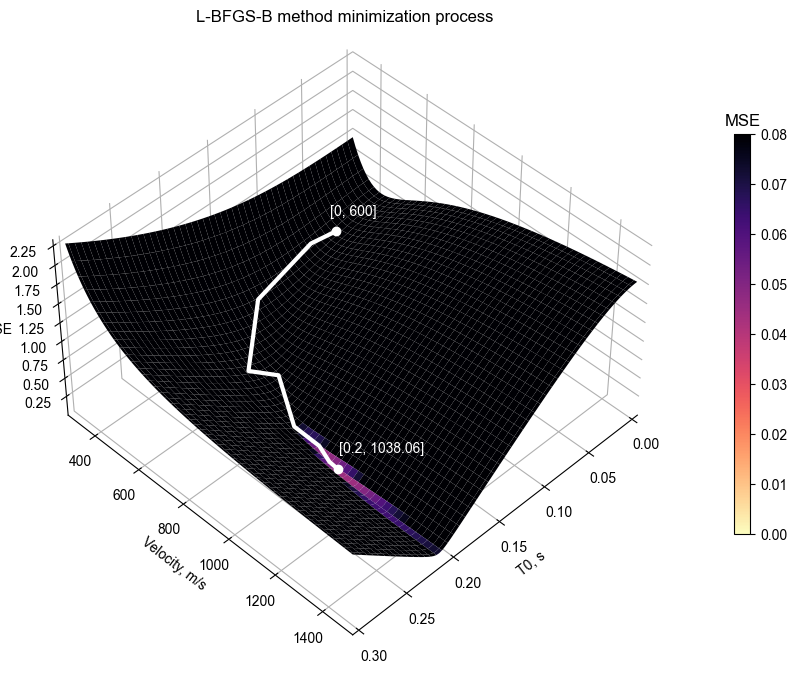

In [738]:
plt.rcParams["font.family"] = "arial"

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect = (5,5,3))
ax.view_init(elev=45., azim=45)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Define the limits
t0_min, t0_max = 0, 0.3
v_min, v_max = 300, 1500

# Create a grid of parameters within the limits
t_grid = np.linspace(t0_min, t0_max, 100)
v_grid = np.linspace(v_min, v_max, 100)
t0_values, v_values = np.meshgrid(t_grid, v_grid)

Z = np.zeros_like(v_values)
for i in range(t0_values.shape[0]):
    for j in range(t0_values.shape[1]):
        Z[i, j] = residuals([t0_values[i,j], v_values[i,j]], x, y, t_measured)

# Creating plot
plt.title("L-BFGS-B method minimization process")
im = ax.plot_surface(t0_values, v_values, Z,cmap = "magma_r", clim = [0, 0.08])
ax.plot(params_history[:,0],params_history[:,1], residuals_history, 'white', zorder = 6, lw = 3)
ax.plot(params_history[0,0],params_history[0,1], residuals_history[0], 'white', zorder = 6, marker = "o")
ax.plot(params_history[-1,0],params_history[-1,1], residuals_history[-1], 'white', zorder = 6, marker = "o")

ax.set_xlim([0, 0.3])
ax.set_ylabel("Velocity, m/s")
ax.set_xlabel("T0, s")
ax.set_zlabel("MSE")
ax.set_ylim([300, 1500])
ax.text(0.1, 600, 1.6, "[0, 600]", c = "white")
ax.text(0.19, 1000, 0.07, "[0.2, 1038.06]", c = "white")

cax = fig.add_axes([1, 0.25, 0.02, 0.5])
fig.colorbar(im, cax=cax, orientation='vertical', shrink = .3)
plt.title("MSE")

# ax.invert_xaxis()


 
# show plot
plt.show()

In [743]:
filepath = r"C:\Users\Владислав\Desktop\optimization_ML"

# Define the limits
t0_min, t0_max = 0, 0.3
v_min, v_max = 300, 1500

# Create a grid of parameters within the limits
t_grid = np.linspace(t0_min, t0_max, 100)
v_grid = np.linspace(v_min, v_max, 100)
t0_values, v_values = np.meshgrid(t_grid, v_grid)

Z = np.zeros_like(v_values)
for i in range(t0_values.shape[0]):
    for j in range(t0_values.shape[1]):
        Z[i, j] = residuals([t0_values[i,j], v_values[i,j]], x, y, t_measured)

    # Creating plot
for i in range(len(residuals_history)):
    plt.rcParams["font.family"] = "arial"

    fig = plt.figure(figsize=(12, 8))
    
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(aspect = (5,5,3))
    ax.view_init(elev=45., azim=45)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')
    
    plt.title(f"TNC method iteration_{i}")
    im = ax.plot_surface(t0_values, v_values, Z,cmap = "magma_r", clim = [0, 0.08])
    ax.plot(params_history[:i+1,0],params_history[:i+1,1], residuals_history[:i+1], 'white', zorder = 6, lw = 3)
    ax.plot(params_history[0,0],params_history[0,1], residuals_history[0], 'white', zorder = 6, marker = "o")
    ax.plot(params_history[i,0],params_history[i,1], residuals_history[i], 'white', zorder = 6, marker = "o")

    ax.set_xlim([0, 0.3])
    ax.set_ylim([300, 1500])
    ax.set_ylabel("Velocity, m/s")
    ax.set_xlabel("T0, s")
    ax.set_zlabel("MSE")
    ax.text(0.1, 600, 1.6, "[0, 600]", c = "white")
    if i > len(residuals_history) - 7:
        ax.text(0.19, 1000, 0.07, "[0.2, 1038.06]", c = "white")
    cax = fig.add_axes([0.8, 0.25, 0.01, 0.5])
    fig.colorbar(im, cax=cax, orientation='vertical', shrink = .3)
    plt.title("MSE")
    
    plt.savefig(filepath + f"//iteration №{i}.png", dpi = 300)
    plt.close()
    # ax.invert_xaxis()



In [744]:
import imageio

images = []
for i in range(len(residuals_history)):
    images.append(imageio.v2.imread(filepath + f"//iteration №{i}.png"))
imageio.mimsave(filepath + 'optimization_tnc.gif', images, fps=6)

Функция времени теперь задается следующим образом:

$$
t = \sqrt{{t_0^2 + \frac{{x^2+y^2}}{{v^2}}}}
$$

Где:
- `t_0` - начальное время,
- `v` - скорость,
- `x` и `y` - координаты.

